# **Rice Leaf Disease Detection** 

## **Task:**  **Multi Image Class Classification**
## **Model Used: Convolutional Neural Network**

### **Importing main Libraries**

In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from matplotlib import pyplot as plt

### **Mounting the Google Drive with Google Colab**

In [78]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **Unzipping the zip files containing images and extracted it to the respective different folders.**

In [ ]:
import zipfile
with zipfile.ZipFile("/content/drive/MyDrive/RiceLeafProject/Bacterial leaf blight-20200814T055237Z-001.zip","r") as zip_ref:
  zip_ref.extractall("/content/drive/MyDrive/RiceLeafProject/BacterialLeaf")
with zipfile.ZipFile("/content/drive/MyDrive/RiceLeafProject/Brown spot-20200814T055208Z-001.zip") as zip_ref2:
  zip_ref2.extractall("/content/drive/MyDrive/RiceLeafProject/BrownSpot")
with zipfile.ZipFile("/content/drive/MyDrive/RiceLeafProject/Leaf smut-20200814T055530Z-001.zip") as zip_ref3:
  zip_ref3.extractall("/content/drive/MyDrive/RiceLeafProject/LeafSmut")
 
      


# **Image Preprocessing - Generating the dataset**

**To be able to use our images for training and testing, lets use ImageDataGenerator.flow_from_directory() which generates batches of normalized tensor image data from the respective data directory.**

* target_size : Will resize all images to the specified size. And here I'm using (224,224,3). 
* batch_size : Is the size of the batch we will use.

## **Path of the files which contained images stored in "path_root" variable**

In [3]:
path_root = "/content/drive/MyDrive/RiceLeafProject"

In [23]:
from keras.preprocessing.image import ImageDataGenerator
batches = ImageDataGenerator().flow_from_directory(directory=path_root, target_size=(224,224), batch_size=64)

Found 119 images belonging to 3 classes.


In [24]:
batches.class_indices

{'BacterialLeaf': 0, 'BrownSpot': 1, 'LeafSmut': 2}

**batches generated with ImageDataGenerator() is an iterator. Hence, we use next() to go through all its elements and generate a batch of images and labels from the data set.**

In [25]:
imgs, labels = next(batches)

**As you can see, our images are in RGB with shape 224x224x3 [width x length x depth]**

In [26]:
imgs.shape

(64, 224, 224, 3)

**labels has the shape (batch_size, number of classes).**

In [27]:
labels.shape

(64, 3)

# **The following method allows us to plot a sample of images in our dataset.**

In [28]:
# plots images with labels within google colab
def plots(ims, figsize=(20,30), rows=10, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = 10 # len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(0,50):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(list(batches.class_indices.keys())[np.argmax(titles[i])], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

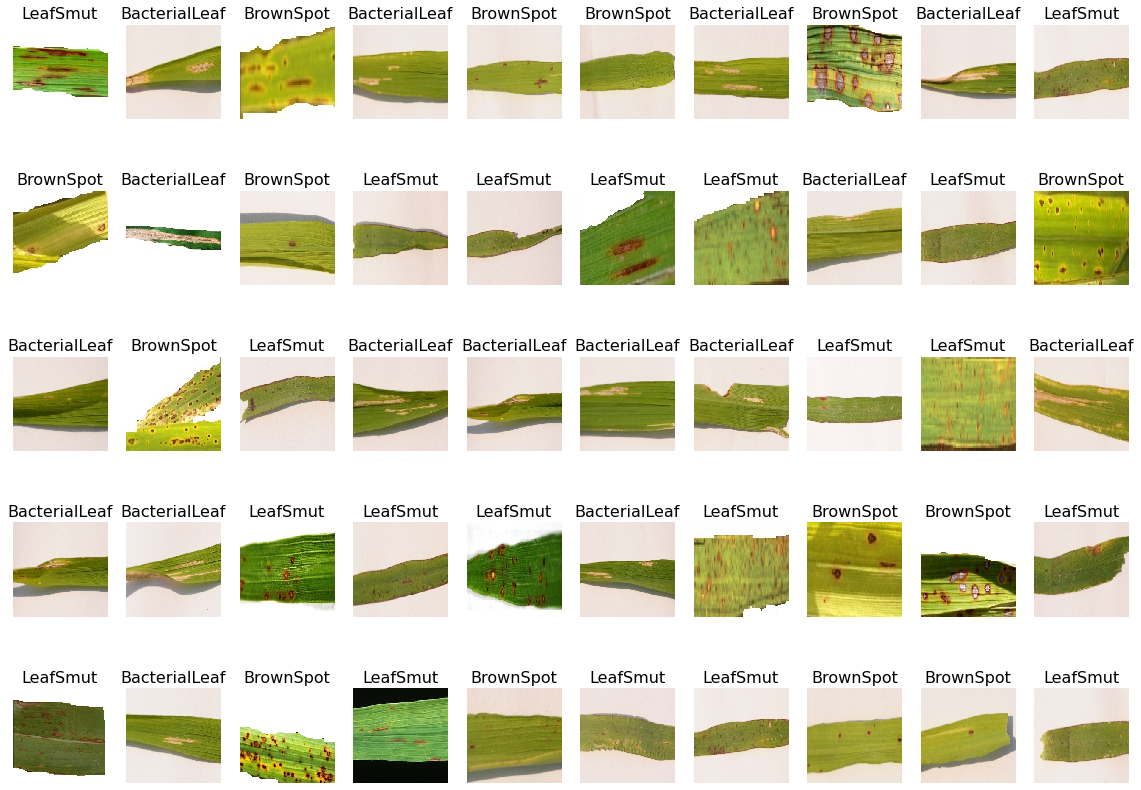

In [29]:
plots(imgs, titles = labels)

## **We can already observe differences between classes.**

# **Analyse**

## **All the images are finally ready to be used. Lets check out the repartition of data between classes:**

In [30]:
classes = batches.class_indices.keys()

In [31]:
perc = (sum(labels)/labels.shape[0])*100

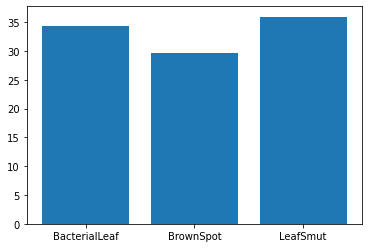

In [32]:
plt.bar(classes,perc)
plt.show()

## **It can be seen that our data is quite balanced here so no need to do balancing here.**

# **Train And Test Splitting**

## **Lets split our model into train and test following a ratio 70% train - 30% test ratio.**

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(imgs/255.,labels, test_size=0.3)

In [34]:
X_train.shape

(44, 224, 224, 3)

In [35]:
X_test.shape

(20, 224, 224, 3)

In [36]:
y_train.shape

(44, 3)

In [37]:
y_test.shape

(20, 3)

# **Convolutional Neural Network Model**
* We will now build our CNN model using Keras. This model will have the        following layers :

* Convolutional Layer : 64 filters, (3 * 3) kernel size
* Max Pooling Layer : (2 * 2) pool size
* Convolutional Layer : 64 filters, (3 * 3) kernel size
* Max Pooling Layer : (2 * 2) pool size
* Convolutional Layer : 128 filters, (3 * 3) kernel size
* Max Pooling Layer : (2 * 2) pool size
* Convolutional Layer : 256 filters, (3 * 3) kernel size
* Max Pooling Layer : (2 * 2) pool size
* Convolutional Layer : 512 filters, (3 * 3) kernel size
* Max Pooling Layer : (2 * 2) pool size

* DropOut Layer : Dropping 25% of neurons.
* Flatten Layer
* Dense/Fully Connected Layer : 512 Neurons, relu activation function
* DropOut Layer : Dropping 50% of neurons.
* Dense/Fully Connected Layer : num_class Neurons, Softmax activation function
* Input shape : 244 244 3

## **Importing required libraries**

In [38]:
import keras
from keras.models import Sequential, Input, Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D


# **Building the model**

In [39]:
def disease_detection_model():
    disease_detection_model = Sequential()
    disease_detection_model.add(Conv2D(64, kernel_size=(3, 3),
                     activation='relu',
                     input_shape=(224,224,3)))
    
    disease_detection_model.add(MaxPooling2D(pool_size=(2, 2)))
    disease_detection_model.add(Conv2D(64, (3, 3), activation='relu'))
    disease_detection_model.add(MaxPooling2D(pool_size=(2, 2)))
    disease_detection_model.add(Conv2D(128, (3, 3), activation='relu'))
    disease_detection_model.add(MaxPooling2D(pool_size=(2, 2)))
    disease_detection_model.add(Conv2D(256, (3, 3), activation='relu'))
    disease_detection_model.add(MaxPooling2D(pool_size=(2, 2)))
    disease_detection_model.add(Conv2D(512, (3, 3), activation='relu'))
    disease_detection_model.add(MaxPooling2D(pool_size=(2, 2)))
    
    disease_detection_model.add(Dropout(0.25))
    disease_detection_model.add(Flatten())
    disease_detection_model.add(Dense(512, activation='relu'))
    disease_detection_model.add(Dropout(0.5))
    disease_detection_model.add(Dense(3, activation='softmax'))
    disease_detection_model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])
    return disease_detection_model

In [40]:
disease_detection_model = disease_detection_model()

# **Summary of the model**

In [41]:
disease_detection_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 128)      0

# **Fitting the model**

In [42]:
callbacks=[keras.callbacks.ModelCheckpoint(filepath="convnet_from_scratch.keras",save_best_only=True,monitor='val_loss')]
history = disease_detection_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, callbacks = callbacks)

Epoch 1/30
2/2 [==============================] - 11s 4s/step - loss: 1.1843 - accuracy: 0.3864 - val_loss: 1.3167 - val_accuracy: 0.3000
Epoch 2/30
2/2 [==============================] - 9s 4s/step - loss: 1.1538 - accuracy: 0.3864 - val_loss: 1.0995 - val_accuracy: 0.3500
Epoch 3/30
2/2 [==============================] - 9s 3s/step - loss: 1.0964 - accuracy: 0.3409 - val_loss: 1.0988 - val_accuracy: 0.3500
Epoch 4/30
2/2 [==============================] - 8s 3s/step - loss: 1.0940 - accuracy: 0.3864 - val_loss: 1.1026 - val_accuracy: 0.3500
Epoch 5/30
2/2 [==============================] - 8s 3s/step - loss: 1.0789 - accuracy: 0.3636 - val_loss: 1.1206 - val_accuracy: 0.3500
Epoch 6/30
2/2 [==============================] - 8s 3s/step - loss: 1.0707 - accuracy: 0.4773 - val_loss: 1.1465 - val_accuracy: 0.3500
Epoch 7/30
2/2 [==============================] - 9s 3s/step - loss: 1.0719 - accuracy: 0.4091 - val_loss: 1.0960 - val_accuracy: 0.4000
Epoch 8/30
2/2 [========================

# **Evaluating the model**

In [43]:
scores = disease_detection_model.evaluate(X_test, y_test)

1/1 [==============================] - 1s 888ms/step - loss: 0.8133 - accuracy: 0.7500


In [44]:
print('Final CNN accuracy: ', scores[1])

Final CNN accuracy:  0.75


## **So, by using 30 epochs we come up with the 75% accuracy.**

# **Now, Using 50 epochs**

In [57]:
def disease_detection_model():
    disease_detection_model = Sequential()
    disease_detection_model.add(Conv2D(64, kernel_size=(3, 3),
                     activation='relu',
                     input_shape=(224,224,3)))
    
    disease_detection_model.add(MaxPooling2D(pool_size=(2, 2)))
    disease_detection_model.add(Conv2D(64, (3, 3), activation='relu'))
    disease_detection_model.add(MaxPooling2D(pool_size=(2, 2)))
    disease_detection_model.add(Conv2D(128, (3, 3), activation='relu'))
    disease_detection_model.add(MaxPooling2D(pool_size=(2, 2)))
    disease_detection_model.add(Conv2D(256, (3, 3), activation='relu'))
    disease_detection_model.add(MaxPooling2D(pool_size=(2, 2)))
    disease_detection_model.add(Dropout(0.2))
    disease_detection_model.add(Conv2D(512, (3, 3), activation='relu'))
    disease_detection_model.add(MaxPooling2D(pool_size=(2, 2)))
    
    disease_detection_model.add(Dropout(0.25))
    disease_detection_model.add(Flatten())
    disease_detection_model.add(Dense(512, activation='relu'))
    disease_detection_model.add(Dropout(0.5))
    disease_detection_model.add(Dense(3, activation='softmax'))
    disease_detection_model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])
    return disease_detection_model

In [58]:
disease_detection_model2 = disease_detection_model()

In [60]:
callbacks=[keras.callbacks.ModelCheckpoint(filepath="convnet_from_scratch.keras",save_best_only=True,monitor='val_loss')]
history = disease_detection_model2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, callbacks = callbacks)

Epoch 1/50
2/2 [==============================] - 12s 6s/step - loss: 1.0596 - accuracy: 0.4773 - val_loss: 1.0901 - val_accuracy: 0.4500
Epoch 2/50
2/2 [==============================] - 13s 5s/step - loss: 1.0650 - accuracy: 0.4545 - val_loss: 1.0893 - val_accuracy: 0.4500
Epoch 3/50
2/2 [==============================] - 10s 3s/step - loss: 1.0526 - accuracy: 0.4773 - val_loss: 1.0883 - val_accuracy: 0.5500
Epoch 4/50
2/2 [==============================] - 9s 4s/step - loss: 1.0302 - accuracy: 0.5682 - val_loss: 1.0994 - val_accuracy: 0.5000
Epoch 5/50
2/2 [==============================] - 9s 3s/step - loss: 1.0226 - accuracy: 0.4318 - val_loss: 1.0919 - val_accuracy: 0.4500
Epoch 6/50
2/2 [==============================] - 11s 4s/step - loss: 0.9744 - accuracy: 0.5455 - val_loss: 1.0210 - val_accuracy: 0.5500
Epoch 7/50
2/2 [==============================] - 9s 3s/step - loss: 0.9008 - accuracy: 0.6136 - val_loss: 0.9579 - val_accuracy: 0.5000
Epoch 8/50
2/2 [=====================

In [61]:
scores = disease_detection_model2.evaluate(X_test, y_test)

1/1 [==============================] - 1s 1s/step - loss: 1.4454 - accuracy: 0.8000


# **By this model, we got 80% accuracy but it can be observe that on training side it is giving 100% accuracy which means our model is overfitting.**

# **Now let's analyze our results using confusion matrix**

# **Confusion Matrix**
###  **Let's analyse our results**

In [48]:
import numpy as np
import pandas as pd    

In [62]:
predict_x=disease_detection_model2.predict(X_test) 
classes_x=np.argmax(predict_x,axis=1)

In [63]:
classes_x

array([0, 0, 1, 2, 0, 2, 2, 0, 0, 2, 2, 2, 1, 1, 2, 0, 0, 2, 0, 2])

## **The above values are the predicted labels.**

In [64]:
y_test2 = np.argmax(y_test, axis=1)

In [65]:
y_test2

array([0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 2, 1, 1, 1, 2, 0, 1, 2, 0, 2])

## **The above values are the actual labels.**

In [66]:
from sklearn import metrics
c_matrix = metrics.confusion_matrix(y_test2,classes_x)

In [67]:
c_matrix

array([[6, 0, 0],
       [2, 3, 2],
       [0, 0, 7]])

# **The following method prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.** 

In [68]:
import seaborn as sns
def confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the outputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

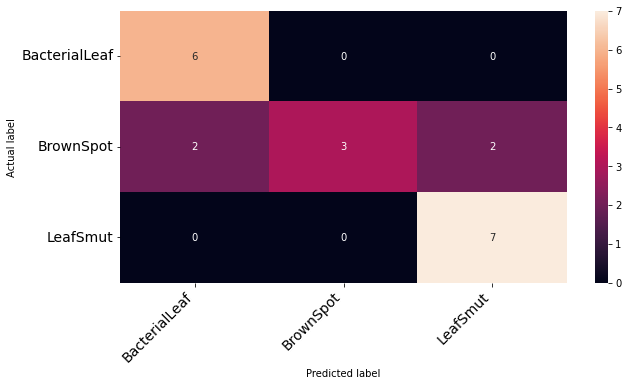

In [69]:
class_names= batches.class_indices.keys()
confusion_matrix(c_matrix, class_names, figsize = (10,5), fontsize=14)

## **It can be seen that this model is giving 2-2 false predictions for brown-spot diseased leaf by seeing confusion matrix**

# **To overcome overfitting problem We're using data augumentation technique as the overfitting problem can also be dur to less amount of data available.**

# **DATA AUGMENTATION TECHNIQUE** 

In [70]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255,
    rotation_range=60, width_shift_range=0.2,
    height_shift_range=0.2, shear_range=0.2, 
    zoom_range=0.2,horizontal_flip=True, 
    fill_mode="nearest", validation_split=0.3)
batch_size = 32

train_dataset = datagen.flow_from_directory(
    path_root,
    target_size=(180, 180),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training')

val_dataset = datagen.flow_from_directory(
    path_root,
    target_size=(180, 180),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation')

Found 84 images belonging to 3 classes.
Found 35 images belonging to 3 classes.


In [71]:
import tensorflow as tf

In [72]:
def create_disease_detection_model():
  model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64,(3,3),activation="relu",input_shape=(180,180,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3),activation="relu",input_shape=(180,180,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256,(3,3),activation="relu",input_shape=(180,180,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation="relu"),
    tf.keras.layers.Dropout(0.5),
   
    tf.keras.layers.Dense(3,activation="softmax")
  ])
  model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])
  
  return model

In [73]:
disease_detection_model3 = create_disease_detection_model()

In [74]:
callbacks = [keras.callbacks.ModelCheckpoint(filepath="convnet_from_scratch.keras",save_best_only = True, monitor = "val_loss")]
history = disease_detection_model3.fit(train_dataset, validation_data=val_dataset, epochs=50)

Epoch 1/50
3/3 [==============================] - 24s 7s/step - loss: 4.2786 - accuracy: 0.2857 - val_loss: 1.6235 - val_accuracy: 0.3429
Epoch 2/50
3/3 [==============================] - 20s 7s/step - loss: 1.2243 - accuracy: 0.3810 - val_loss: 1.2408 - val_accuracy: 0.3143
Epoch 3/50
3/3 [==============================] - 20s 6s/step - loss: 1.1570 - accuracy: 0.2976 - val_loss: 1.0976 - val_accuracy: 0.3429
Epoch 4/50
3/3 [==============================] - 20s 6s/step - loss: 1.1050 - accuracy: 0.3929 - val_loss: 1.1369 - val_accuracy: 0.3143
Epoch 5/50
3/3 [==============================] - 19s 7s/step - loss: 1.0959 - accuracy: 0.3333 - val_loss: 1.1022 - val_accuracy: 0.3714
Epoch 6/50
3/3 [==============================] - 20s 6s/step - loss: 1.0743 - accuracy: 0.4286 - val_loss: 1.1087 - val_accuracy: 0.2857
Epoch 7/50
3/3 [==============================] - 20s 6s/step - loss: 1.0686 - accuracy: 0.4524 - val_loss: 1.2300 - val_accuracy: 0.3143
Epoch 8/50
3/3 [==================

In [83]:
test_loss, test_acc = disease_detection_model3.evaluate(val_dataset)
print(f"Test accuracy: {test_acc:.3f}")

2/2 [==============================] - 3s 179ms/step - loss: 1.8264 - accuracy: 0.7143
Test accuracy: 0.714


# **By this model, we have got a training accuracy 72% which is less than the first model but we have got the test accuracy of 71% which means the problem of overfitting has been resolved to some extent.**

# **Displaying curves of loass and accuracy during training.**

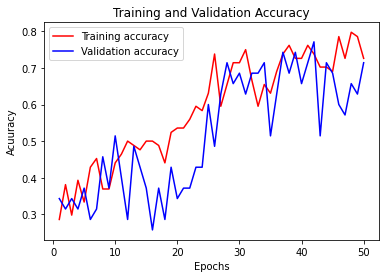

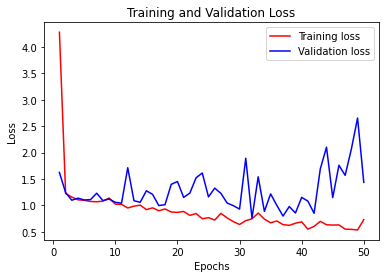

In [76]:
import matplotlib.pyplot as plt
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1,len(accuracy)+1)

plt.plot(epochs,accuracy,"r",label = "Training accuracy")
plt.plot(epochs,val_accuracy,"b",label="Validation accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Acuuracy")
plt.legend()
plt.figure()
plt.plot(epochs,loss,"r",label = "Training loss")
plt.plot(epochs,val_loss,"b",label = "Validation loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# **So we seeing the variation of loss and accuracy in the above graphs.**
* **From which we got to know that as the training loss going downwards by increasing the number of epochs, and validation accuracy showing somewhat same trend as at some point its increasing and at some point its decreasing.**
* **And the training accuracy and validation accuracy goingon increasing with increase in number of epochs.**




# **TESTING THE MODEL WITH A SAMPLE IMAGE**

In [127]:
import tensorflow
from tensorflow.keras.preprocessing import image
import numpy as np

# **I just picked out these sample images from google and going to test these with our designed model.**



# **Firstly, Let's check the probability of Brown Spot Leaf Disease.**

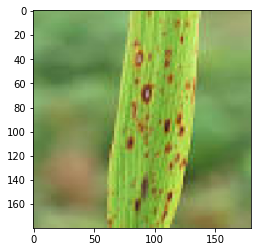

In [149]:
img_path = "/content/brspot.jpg"
img = image.load_img(img_path,target_size=(180,180))
plt.imshow(img)
plt.show()

In [153]:
image_array = keras.preprocessing.image.img_to_array(img)
img_batch = np.expand_dims(image_array,0)
prediction1 = disease_detection_model3.predict(img_batch)
score1 = prediction1[0]

In [162]:
print(score1)
print("Index:",np.argmax(score1))

[0. 1. 0.]
Index: 1


## **So the predict function is giving is the probability values of all 3 labels and the label with the highest probability is the final prediction. In Our case, we got the label at the 1 index as the prediction. So our model predict this true as Index 1 (2nd class) i.e. of Brown Spot.**

# **Firstly check the indexes of the classes here.** 

In [157]:
batches.class_indices

{'BacterialLeaf': 0, 'BrownSpot': 1, 'LeafSmut': 2}

# **Now, Let's check how our model predict leaf smut.**

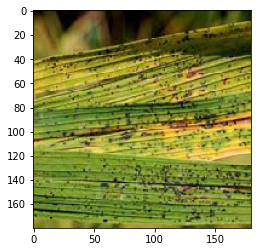

In [158]:
img_path2 = "/content/Leaf_smut.jpg"
img = image.load_img(img_path2,target_size=(180,180))
plt.imshow(img)
plt.show()

In [159]:
image_array = keras.preprocessing.image.img_to_array(img)
img_batch = np.expand_dims(image_array,0)
predictions2 = disease_detection_model3.predict(img_batch)
score2 = predictions2[0]
print(score2)
print("Index:",np.argmax(score2))

[0. 0. 1.]
Index: 2


## **This is predicting index 2 (3rd class) i.e. true. So, our model is doing well.**

# **Lastly, let's check how our model predict the Bacterial Blight leaf disease.**

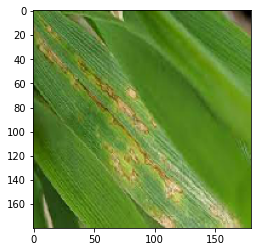

In [163]:
img_path3 = "/content/Bacterial_Blight.jpg"
img = image.load_img(img_path3,target_size=(180,180))
plt.imshow(img)
plt.show()

In [164]:
image_array = keras.preprocessing.image.img_to_array(img)
img_batch = np.expand_dims(image_array,0)
predictions3 = disease_detection_model3.predict(img_batch)
score3 = predictions3[0]
print(score3)
print("Index:",np.argmax(score3))

[1.000000e+00 6.400189e-29 0.000000e+00]
Index: 0


# **Here, it is giving the label with the highest probability as index '0' i.e. Bacterial Blight so our model is predicting well.**

# **What we can do next?**
* **Improve the accuracy more** 
* **By increasing epochs, dropouts and applying different data       augmentation techniques.** 